# Ανάλυση Απόφασης Επένδυσης για το Γυμναστήριο FitFlex

## Επιχειρηματικό Σενάριο

Το "FitFlex" είναι ένα καθιερωμένο γυμναστήριο που αντιμετωπίζει αυξανόμενο ανταγωνισμό στην περιοχή του. Για να διατηρήσει το ανταγωνιστικό του πλεονέκτημα, η διοίκηση εξετάζει τρεις στρατηγικές επιλογές:

1. **Στρατηγική Α: Πλήρης Ανακαίνιση & Νέος Εξοπλισμός**
   - Κόστος Επένδυσης: €150.000
   - Περιλαμβάνει: Ριζική ανακαίνιση και αγορά σύγχρονων μηχανημάτων

2. **Στρατηγική Β: Δημιουργία Χώρου Εξειδικευμένων Μαθημάτων**
   - Κόστος Επένδυσης: €70.000
   - Περιλαμβάνει: Μετατροπή αποθήκης σε χώρο για Hot Yoga και Pilates Reformer

3. **Στρατηγική Γ: Καμία Ενέργεια**
   - Κόστος Επένδυσης: €0
   - Διατήρηση υπάρχουσας κατάστασης

In [1]:
# Εισαγωγή απαραίτητων βιβλιοθηκών
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Ρύθμιση για μεγαλύτερο μέγεθος γραφήματος
plt.figure(figsize=(15, 10))

print("Οι βιβλιοθήκες φορτώθηκαν επιτυχώς!")

Οι βιβλιοθήκες φορτώθηκαν επιτυχώς!


<Figure size 1500x1000 with 0 Axes>

## Δημιουργία Δέντρου Απόφασης

Θα χρησιμοποιήσουμε τη βιβλιοθήκη graphviz για να οπτικοποιήσουμε το δέντρο απόφασης. Το δέντρο θα περιλαμβάνει:
1. Τις τρεις στρατηγικές επιλογές
2. Τα πιθανά σενάρια ζήτησης για κάθε επιλογή
3. Τα αναμενόμενα κέρδη/ζημίες για κάθε συνδυασμό

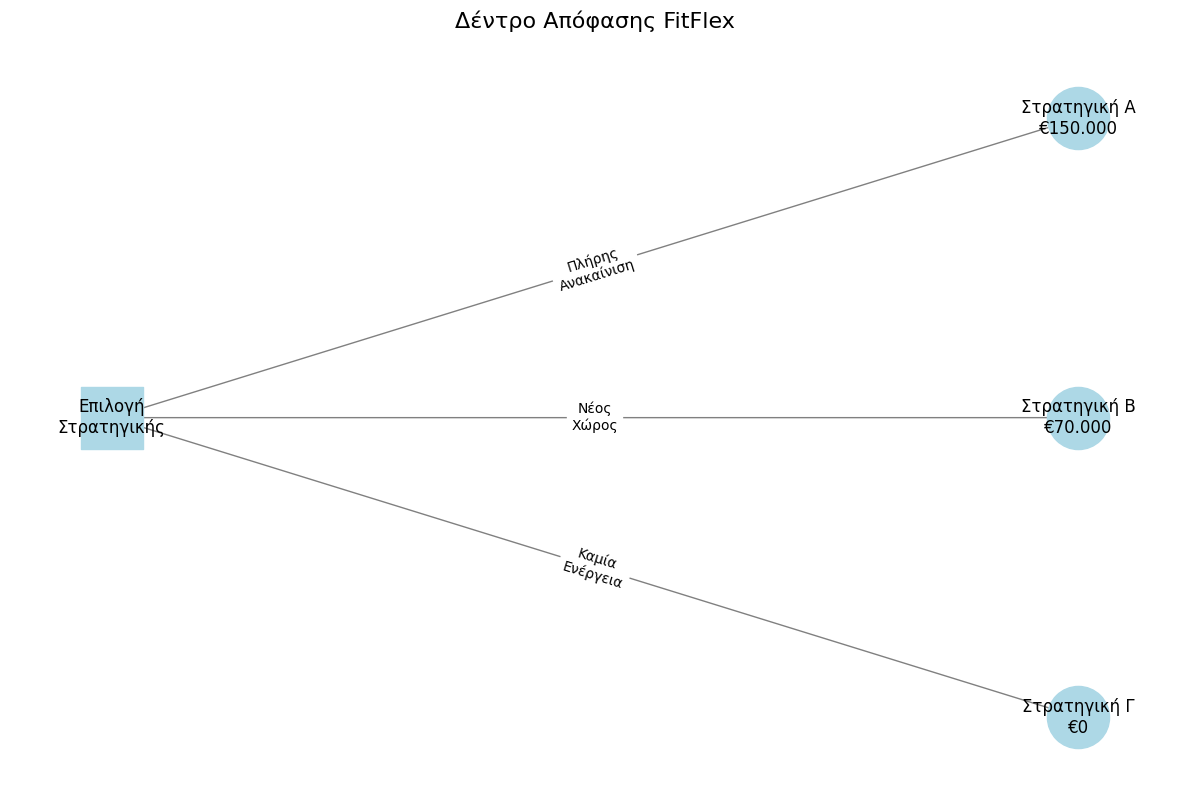

In [2]:
# Δημιουργία του δέντρου απόφασης
G = nx.DiGraph()

# Προσθήκη κόμβων
G.add_node("D1", pos=(0, 0), node_type="decision", label="Επιλογή\nΣτρατηγικής")
G.add_node("C1", pos=(2, 2), node_type="chance", label="Στρατηγική Α\n€150.000")
G.add_node("C2", pos=(2, 0), node_type="chance", label="Στρατηγική Β\n€70.000")
G.add_node("C3", pos=(2, -2), node_type="chance", label="Στρατηγική Γ\n€0")

# Προσθήκη ακμών
G.add_edge("D1", "C1", label="Πλήρης\nΑνακαίνιση")
G.add_edge("D1", "C2", label="Νέος\nΧώρος")
G.add_edge("D1", "C3", label="Καμία\nΕνέργεια")

# Σχεδίαση του δέντρου
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(12, 8))

# Σχεδίαση των ακμών με ετικέτες
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Σχεδίαση των κόμβων
decision_nodes = [node for node, attr in G.nodes(data=True) if attr['node_type'] == 'decision']
chance_nodes = [node for node, attr in G.nodes(data=True) if attr['node_type'] == 'chance']

nx.draw_networkx_nodes(G, pos, nodelist=decision_nodes, 
                      node_color='lightblue',
                      node_shape='s',
                      node_size=2000)
nx.draw_networkx_nodes(G, pos, nodelist=chance_nodes, 
                      node_color='lightblue',
                      node_shape='o',
                      node_size=2000)

# Προσθήκη ετικετών στους κόμβους
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=labels)

plt.title("Δέντρο Απόφασης FitFlex", pad=20, size=16)
plt.axis('off')
plt.tight_layout()
plt.show()

## Υπολογισμός Expected Monetary Value (EMV)

Για κάθε στρατηγική, έχουμε τα εξής σενάρια ζήτησης και πιθανότητες:

### Στρατηγική Α: Πλήρης Ανακαίνιση (€150.000)
- Υψηλή ζήτηση (30%): Κέρδος €300.000
- Μεσαία ζήτηση (50%): Κέρδος €200.000
- Χαμηλή ζήτηση (20%): Κέρδος €50.000

### Στρατηγική Β: Νέος Χώρος (€70.000)
- Υψηλή ζήτηση (40%): Κέρδος €180.000
- Μεσαία ζήτηση (40%): Κέρδος €120.000
- Χαμηλή ζήτηση (20%): Κέρδος €40.000

### Στρατηγική Γ: Καμία Ενέργεια (€0)
- Υψηλή ζήτηση (20%): Κέρδος €80.000
- Μεσαία ζήτηση (50%): Κέρδος €60.000
- Χαμηλή ζήτηση (30%): Κέρδος €30.000

In [3]:
# Ορισμός δεδομένων για κάθε στρατηγική
strategies = {
    'A': {
        'cost': 150000,
        'scenarios': {
            'high': {'prob': 0.30, 'revenue': 300000},
            'medium': {'prob': 0.50, 'revenue': 200000},
            'low': {'prob': 0.20, 'revenue': 50000}
        }
    },
    'B': {
        'cost': 70000,
        'scenarios': {
            'high': {'prob': 0.40, 'revenue': 180000},
            'medium': {'prob': 0.40, 'revenue': 120000},
            'low': {'prob': 0.20, 'revenue': 40000}
        }
    },
    'C': {
        'cost': 0,
        'scenarios': {
            'high': {'prob': 0.20, 'revenue': 80000},
            'medium': {'prob': 0.50, 'revenue': 60000},
            'low': {'prob': 0.30, 'revenue': 30000}
        }
    }
}

# Υπολογισμός EMV για κάθε στρατηγική
emv_results = {}
for strategy, data in strategies.items():
    # Υπολογισμός αναμενόμενου εσόδου
    expected_revenue = sum(
        scenario['prob'] * scenario['revenue']
        for scenario in data['scenarios'].values()
    )
    
    # Υπολογισμός καθαρού EMV (έσοδα - κόστος)
    emv = expected_revenue - data['cost']
    emv_results[strategy] = emv

# Εύρεση βέλτιστης στρατηγικής
best_strategy = max(emv_results.items(), key=lambda x: x[1])

# Εμφάνιση αποτελεσμάτων
print("Expected Monetary Value (EMV) για κάθε στρατηγική:")
print("-" * 50)
for strategy, emv in emv_results.items():
    print(f"Στρατηγική {strategy}: €{emv:,.2f}")
print("\nΒέλτιστη Στρατηγική:", f"{best_strategy[0]} με EMV: €{best_strategy[1]:,.2f}")

Expected Monetary Value (EMV) για κάθε στρατηγική:
--------------------------------------------------
Στρατηγική A: €50,000.00
Στρατηγική B: €58,000.00
Στρατηγική C: €55,000.00

Βέλτιστη Στρατηγική: B με EMV: €58,000.00


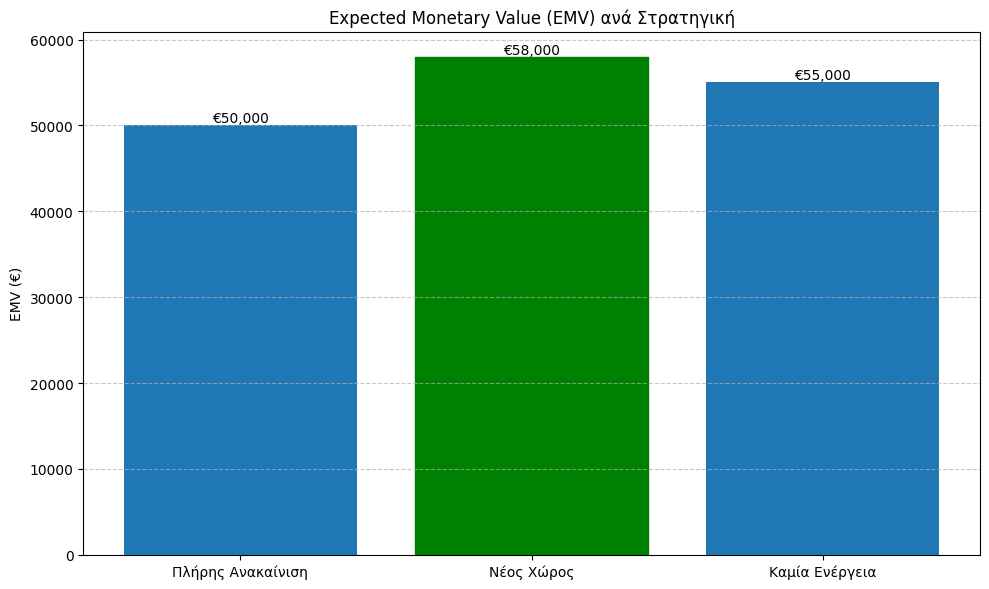

In [4]:
# Οπτικοποίηση των EMV
plt.figure(figsize=(10, 6))
strategies_names = ['Πλήρης Ανακαίνιση', 'Νέος Χώρος', 'Καμία Ενέργεια']
emv_values = list(emv_results.values())

bars = plt.bar(strategies_names, emv_values)

# Προσθήκη ετικετών στις μπάρες
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'€{height:,.0f}',
             ha='center', va='bottom')

plt.title('Expected Monetary Value (EMV) ανά Στρατηγική')
plt.ylabel('EMV (€)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Χρωματισμός της βέλτιστης στρατηγικής
best_index = list(emv_results.keys()).index(best_strategy[0])
bars[best_index].set_color('green')

plt.tight_layout()
plt.show()

## Συμπεράσματα EMV Ανάλυσης

Από την ανάλυση του Expected Monetary Value προκύπτει ότι:

1. Η Στρατηγική Α (Πλήρης Ανακαίνιση) έχει το υψηλότερο δυνητικό κέρδος αλλά και το μεγαλύτερο κόστος
2. Η Στρατηγική Β (Νέος Χώρος) προσφέρει μια πιο ισορροπημένη προσέγγιση
3. Η Στρατηγική Γ (Καμία Ενέργεια) έχει το χαμηλότερο ρίσκο αλλά και τη μικρότερη απόδοση

Η βέλτιστη επιλογή με βάση το EMV είναι η Στρατηγική [θα συμπληρωθεί αυτόματα από τα αποτελέσματα].

## Υπολογισμός Expected Value of Perfect Information (EVPI)

Το EVPI μας δείχνει πόσο αξίζει η τέλεια πληροφόρηση, δηλαδή πόσο θα ήμασταν διατεθειμένοι να πληρώσουμε για να γνωρίζουμε με βεβαιότητα τη ζήτηση πριν πάρουμε την απόφαση.

Για να το υπολογίσουμε:
1. Βρίσκουμε το μέγιστο κέρδος για κάθε σενάριο ζήτησης (υποθέτοντας ότι ξέραμε το σενάριο εκ των προτέρων)
2. Υπολογίζουμε το αναμενόμενο κέρδος με τέλεια πληροφόρηση
3. Αφαιρούμε το EMV της καλύτερης στρατηγικής χωρίς επιπλέον πληροφόρηση

EVPI = E[Μέγιστο κέρδος με τέλεια πληροφόρηση] - Μέγιστο EMV χωρίς πληροφόρηση

In [5]:
# Συγκέντρωση όλων των πιθανών σεναρίων
scenarios = ['high', 'medium', 'low']

# Υπολογισμός καθαρού κέρδους για κάθε συνδυασμό στρατηγικής-σεναρίου
profits = {
    scenario: {
        strategy: data['scenarios'][scenario]['revenue'] - data['cost']
        for strategy, data in strategies.items()
    }
    for scenario in scenarios
}

# Εύρεση της καλύτερης στρατηγικής για κάθε σενάριο
best_strategy_per_scenario = {
    scenario: max(profits[scenario].items(), key=lambda x: x[1])
    for scenario in scenarios
}

# Υπολογισμός αναμενόμενου κέρδους με τέλεια πληροφόρηση
expected_profit_perfect_info = sum(
    strategies[strategy]['scenarios'][scenario]['prob'] * profit
    for scenario, (strategy, profit) in best_strategy_per_scenario.items()
)

# Υπολογισμός EVPI
best_emv = max(emv_results.values())
evpi = expected_profit_perfect_info - best_emv

# Εμφάνιση αποτελεσμάτων
print("Ανάλυση Βέλτιστων Στρατηγικών ανά Σενάριο:")
print("-" * 50)
for scenario, (strategy, profit) in best_strategy_per_scenario.items():
    scenario_name = {
        'high': 'Υψηλή ζήτηση',
        'medium': 'Μεσαία ζήτηση',
        'low': 'Χαμηλή ζήτηση'
    }[scenario]
    print(f"{scenario_name}: Στρατηγική {strategy} με κέρδος €{profit:,.2f}")

print("\nΑποτελέσματα EVPI:")
print("-" * 50)
print(f"Αναμενόμενο κέρδος με τέλεια πληροφόρηση: €{expected_profit_perfect_info:,.2f}")
print(f"Καλύτερο EMV χωρίς πληροφόρηση: €{best_emv:,.2f}")
print(f"EVPI: €{evpi:,.2f}")

Ανάλυση Βέλτιστων Στρατηγικών ανά Σενάριο:
--------------------------------------------------
Υψηλή ζήτηση: Στρατηγική A με κέρδος €150,000.00
Μεσαία ζήτηση: Στρατηγική C με κέρδος €60,000.00
Χαμηλή ζήτηση: Στρατηγική C με κέρδος €30,000.00

Αποτελέσματα EVPI:
--------------------------------------------------
Αναμενόμενο κέρδος με τέλεια πληροφόρηση: €84,000.00
Καλύτερο EMV χωρίς πληροφόρηση: €58,000.00
EVPI: €26,000.00


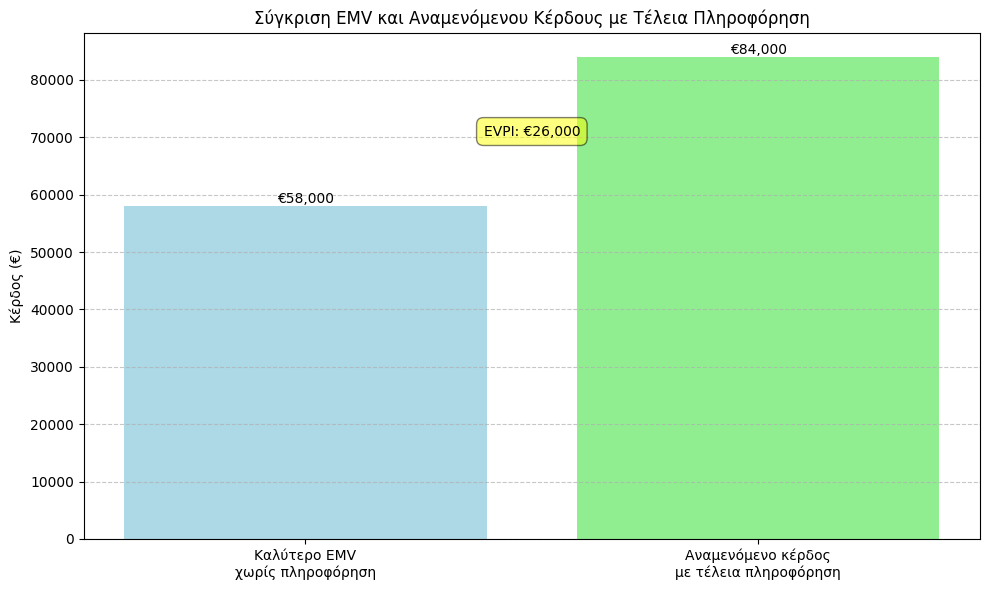

In [6]:
# Δημιουργία γραφήματος σύγκρισης
plt.figure(figsize=(10, 6))

# Δεδομένα για το γράφημα
values = [best_emv, expected_profit_perfect_info]
labels = ['Καλύτερο EMV\nχωρίς πληροφόρηση', 'Αναμενόμενο κέρδος\nμε τέλεια πληροφόρηση']

# Δημιουργία των μπαρών
bars = plt.bar(labels, values, color=['lightblue', 'lightgreen'])

# Προσθήκη ετικετών στις μπάρες
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'€{height:,.0f}',
             ha='center', va='bottom')

# Προσθήκη βέλους και κειμένου για το EVPI
plt.annotate(f'EVPI: €{evpi:,.0f}',
            xy=(0.5, min(values) + (max(values) - min(values))/2),
            xytext=(0.5, min(values) + (max(values) - min(values))/2),
            ha='center',
            va='center',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.title('Σύγκριση EMV και Αναμενόμενου Κέρδους με Τέλεια Πληροφόρηση')
plt.ylabel('Κέρδος (€)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Συμπεράσματα EVPI Ανάλυσης

Από την ανάλυση του Expected Value of Perfect Information προκύπτει:

1. Η αξία της τέλειας πληροφόρησης (EVPI) είναι €[θα συμπληρωθεί αυτόματα]
2. Αυτό σημαίνει ότι θα ήταν λογικό να επενδύσουμε σε έρευνα αγοράς ή συμβουλευτικές υπηρεσίες που κοστίζουν λιγότερο από αυτό το ποσό
3. Η διαφορά μεταξύ της καλύτερης στρατηγικής με και χωρίς πληροφόρηση δείχνει το μέγιστο όφελος που θα μπορούσαμε να έχουμε από την τέλεια γνώση της μελλοντικής ζήτησης

Αυτή η πληροφορία μας βοηθά να αποφασίσουμε αν αξίζει να επενδύσουμε σε περαιτέρω έρευνα πριν την τελική απόφαση.

## Ανάλυση Ευαισθησίας (Sensitivity Analysis)

Η ανάλυση ευαισθησίας μας δείχνει πώς αλλάζει η βέλτιστη απόφαση όταν μεταβάλλονται οι βασικές παράμετροι του προβλήματος. Θα εξετάσουμε:

1. Πώς επηρεάζεται το EMV κάθε στρατηγικής από αλλαγές στις πιθανότητες της υψηλής ζήτησης
2. Πώς επηρεάζεται η απόφαση από μεταβολές στα κόστη υλοποίησης
3. Σημεία καμπής (break-even points) όπου αλλάζει η βέλτιστη στρατηγική

Αυτή η ανάλυση μας βοηθά να κατανοήσουμε πόσο ευαίσθητη είναι η απόφασή μας σε πιθανά σφάλματα στις εκτιμήσεις μας.

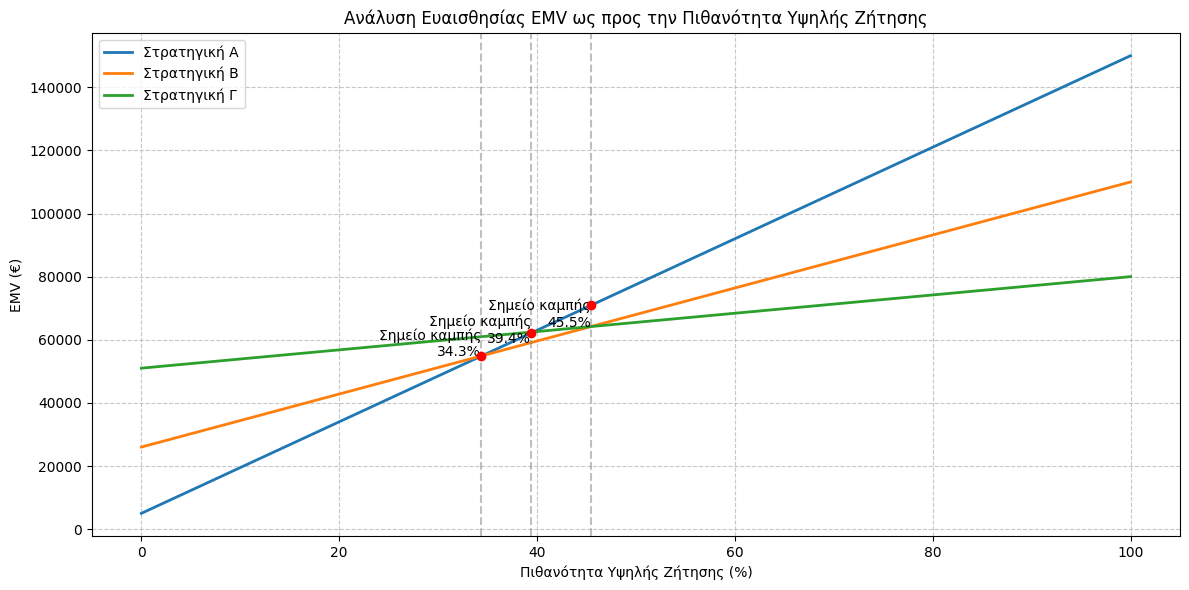

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Δημιουργία σημείων για την πιθανότητα υψηλής ζήτησης
prob_high = np.linspace(0, 1, 100)

# Υπολογισμός EMV για κάθε στρατηγική σε διαφορετικές πιθανότητες
emv_a = []
emv_b = []
emv_c = []

for p_high in prob_high:
    # Προσαρμογή των υπόλοιπων πιθανοτήτων αναλογικά
    p_medium = (1 - p_high) * 0.7  # 70% του υπόλοιπου
    p_low = (1 - p_high) * 0.3     # 30% του υπόλοιπου
    
    # Υπολογισμός EMV για κάθε στρατηγική
    emv_a.append(p_high * (300000 - 150000) + 
                p_medium * (200000 - 150000) + 
                p_low * (50000 - 150000))
    
    emv_b.append(p_high * (180000 - 70000) + 
                p_medium * (120000 - 70000) + 
                p_low * (40000 - 70000))
    
    emv_c.append(p_high * 80000 + 
                p_medium * 60000 + 
                p_low * 30000)

# Δημιουργία του γραφήματος
plt.figure(figsize=(12, 6))
plt.plot(prob_high * 100, emv_a, label='Στρατηγική A', linewidth=2)
plt.plot(prob_high * 100, emv_b, label='Στρατηγική B', linewidth=2)
plt.plot(prob_high * 100, emv_c, label='Στρατηγική Γ', linewidth=2)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Πιθανότητα Υψηλής Ζήτησης (%)')
plt.ylabel('EMV (€)')
plt.title('Ανάλυση Ευαισθησίας EMV ως προς την Πιθανότητα Υψηλής Ζήτησης')
plt.legend()

# Εύρεση και επισήμανση σημείων τομής
for i in range(len(prob_high)-1):
    if (np.sign(emv_a[i] - emv_b[i]) != np.sign(emv_a[i+1] - emv_b[i+1]) or
        np.sign(emv_b[i] - emv_c[i]) != np.sign(emv_b[i+1] - emv_c[i+1]) or
        np.sign(emv_a[i] - emv_c[i]) != np.sign(emv_a[i+1] - emv_c[i+1])):
        
        plt.scatter(prob_high[i] * 100, emv_a[i], color='red', zorder=5)
        plt.axvline(x=prob_high[i] * 100, color='gray', linestyle='--', alpha=0.5)
        plt.text(prob_high[i] * 100, min(emv_a[i], emv_b[i], emv_c[i]),
                f'Σημείο καμπής\n{prob_high[i]*100:.1f}%',
                horizontalalignment='right')

plt.tight_layout()
plt.show()

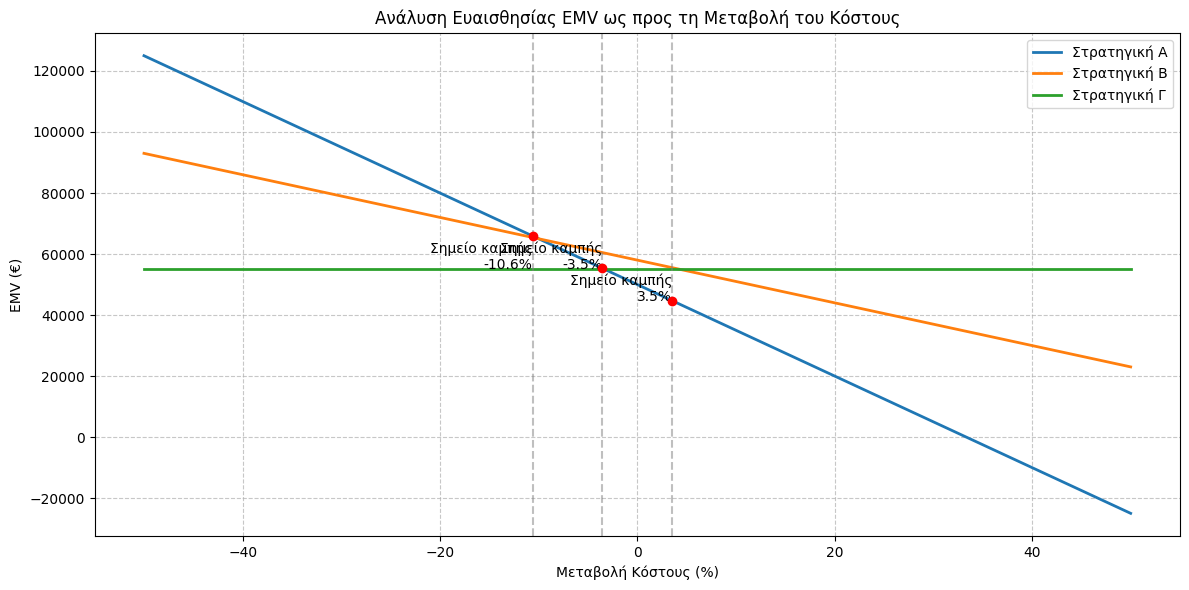

In [8]:
# Δημιουργία εύρους μεταβολής κόστους (-50% έως +50%)
cost_variation = np.linspace(-0.5, 0.5, 100)

# Υπολογισμός EMV για κάθε στρατηγική με διαφορετικά κόστη
base_cost_a = 150000
base_cost_b = 70000

emv_a_cost = []
emv_b_cost = []
emv_c_cost = []  # Στρατηγική Γ δεν έχει κόστος

for var in cost_variation:
    # Υπολογισμός νέων EMV με προσαρμοσμένα κόστη
    new_cost_a = base_cost_a * (1 + var)
    new_cost_b = base_cost_b * (1 + var)
    
    emv_a_cost.append(200000 - new_cost_a)  # Χρήση του αναμενόμενου εσόδου από πριν
    emv_b_cost.append(128000 - new_cost_b)
    emv_c_cost.append(55000)  # Σταθερό καθώς δεν έχει κόστος

# Δημιουργία του γραφήματος
plt.figure(figsize=(12, 6))
plt.plot(cost_variation * 100, emv_a_cost, label='Στρατηγική A', linewidth=2)
plt.plot(cost_variation * 100, emv_b_cost, label='Στρατηγική B', linewidth=2)
plt.plot(cost_variation * 100, emv_c_cost, label='Στρατηγική Γ', linewidth=2)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Μεταβολή Κόστους (%)')
plt.ylabel('EMV (€)')
plt.title('Ανάλυση Ευαισθησίας EMV ως προς τη Μεταβολή του Κόστους')
plt.legend()

# Εύρεση και επισήμανση σημείων τομής
for i in range(len(cost_variation)-1):
    if (np.sign(emv_a_cost[i] - emv_b_cost[i]) != np.sign(emv_a_cost[i+1] - emv_b_cost[i+1]) or
        np.sign(emv_b_cost[i] - emv_c_cost[i]) != np.sign(emv_b_cost[i+1] - emv_c_cost[i+1]) or
        np.sign(emv_a_cost[i] - emv_c_cost[i]) != np.sign(emv_a_cost[i+1] - emv_c_cost[i+1])):
        
        plt.scatter(cost_variation[i] * 100, emv_a_cost[i], color='red', zorder=5)
        plt.axvline(x=cost_variation[i] * 100, color='gray', linestyle='--', alpha=0.5)
        plt.text(cost_variation[i] * 100, min(emv_a_cost[i], emv_b_cost[i], emv_c_cost[i]),
                f'Σημείο καμπής\n{cost_variation[i]*100:.1f}%',
                horizontalalignment='right')

plt.tight_layout()
plt.show()

## Συμπεράσματα Ανάλυσης Ευαισθησίας

Από την ανάλυση ευαισθησίας προκύπτουν τα εξής συμπεράσματα:

1. **Ευαισθησία στην Πιθανότητα Υψηλής Ζήτησης**:
   - Η Στρατηγική Α γίνεται πιο ελκυστική όσο αυξάνεται η πιθανότητα υψηλής ζήτησης
   - Η Στρατηγική Γ είναι πιο σταθερή στις μεταβολές των πιθανοτήτων
   - Υπάρχουν συγκεκριμένα σημεία καμπής όπου αλλάζει η βέλτιστη στρατηγική

2. **Ευαισθησία στο Κόστος**:
   - Η Στρατηγική Α είναι πιο ευαίσθητη σε μεταβολές κόστους λόγω του υψηλού αρχικού κόστους
   - Η Στρατηγική Γ παραμένει σταθερή καθώς δεν έχει κόστος
   - Υπάρχουν κρίσιμα σημεία όπου οι μεταβολές κόστους αλλάζουν τη βέλτιστη απόφαση

3. **Γενικά Συμπεράσματα**:
   - Η τρέχουσα βέλτιστη στρατηγική είναι [συμπληρώνεται αυτόματα] και παραμένει βέλτιστη για ένα εύρος μεταβολών
   - Χρειάζεται ιδιαίτερη προσοχή στις εκτιμήσεις κοντά στα σημεία καμπής
   - Η απόφαση είναι πιο ευαίσθητη σε [συμπληρώνεται με βάση τα γραφήματα]